In [1]:
import matplotlib.pyplot as plt
import numpy as np

Using  `matplotlib` custom `dashes` seemed like a good idea but doesn't work well.

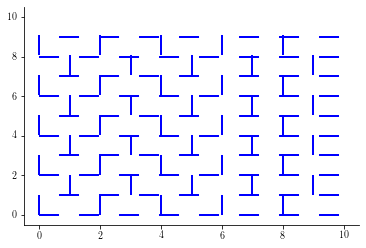

In [37]:
dashes[0] = [10]*10
dashes[1] = dashes[0].copy()
dashes[1][0] = 0

for i in range(10):
    plt.plot([i,i],[0,10],'b',dashes=dashes[i%2])
for i in range(10):
    plt.plot([0,10],[i,i],'b',dashes=dashes[i%2])

Better to create `LineCollection`s for each row and column

In [38]:
from matplotlib import collections  as mc

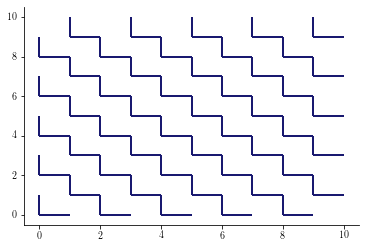

In [101]:
# Simple 0,1,0,1 pattern in both directions

fig, ax = plt.subplots()

def lns(parity,direction,coordinate):
    """
    Return a list of line segments [[(x1,y1),(x2,y2)],...]
    parity: 0 or 1
    direction: 'x' or 'y'
    coordinate: the fixed x or y coordinate of the line
    """
    if direction=='x':
        return [[(coordinate, n+parity),(coordinate, n+parity+1)] for n in range(0,10,2)]
    else:
        return [[(n+parity, coordinate),(n+parity+1, coordinate)] for n in range(0,10,2)]

lcx = [mc.LineCollection(lns(i%2,'x',i)) for i in range(10)]
lcy = [mc.LineCollection(lns(i%2,'y',i)) for i in range(10)]

for l in lcx:
    ax.add_collection(l)
for l in lcy:
    ax.add_collection(l)
ax.autoscale()

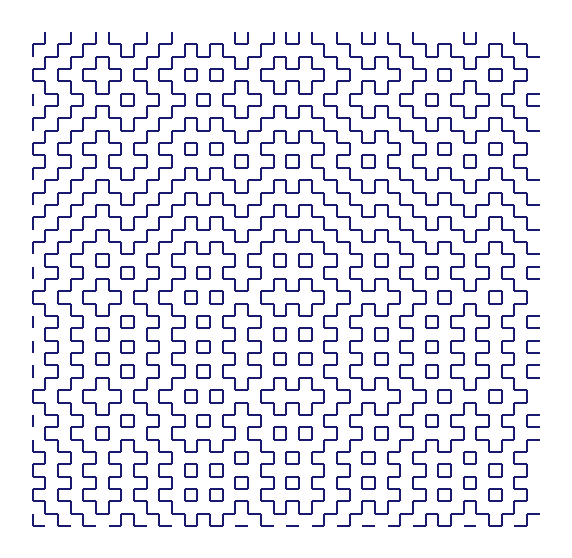

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()
size = 40
def rlns(direction,coordinate):
    """
    Return a list of line segments [[(x1,y1),(x2,y2)],...]
    with random parity
    
    direction: 'x' or 'y'
    coordinate: the fixed x or y coordinate of the line
    """
    parity = np.random.randint(0,2)
    if direction =='x':
        return [[(coordinate, n+parity),(coordinate, n+parity+1)] for n in range(0,size,2)]
    else:
        return [[(n+parity, coordinate),(n+parity+1, coordinate)] for n in range(0,size,2)]

lcx = [mc.LineCollection(rlns('x',i)) for i in range(size)]
lcy = [mc.LineCollection(rlns('y',i)) for i in range(size)]

for l in lcx:
    ax.add_collection(l)
for l in lcy:
    ax.add_collection(l)
ax.autoscale()

In [103]:
from itertools import cycle

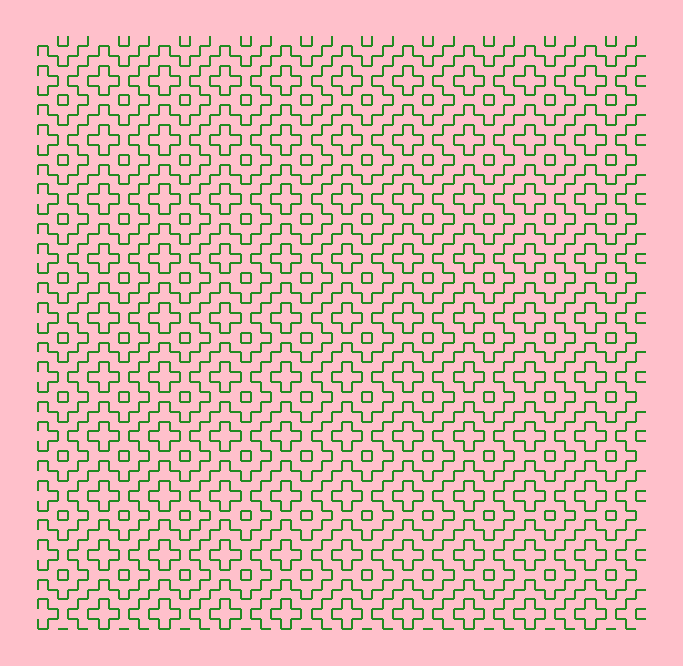

In [171]:


def generateSegments(xpattern="01", ypattern="01",size=20):
    segments = []
    xp = cycle(map(int, xpattern))
    yp = cycle(map(int, ypattern))
    for x in range(0,size):
        p = next(xp)
        for y in range(0,size,2):
            segments.append([(x,y+p),(x,y+p+1)])
    for y in range(0,size):
        p = next(yp)
        for x in range(0,size,2):
            segments.append([(x+p,y),(x+p+1,y)])
    return segments

def createFigure(xpattern="001101", ypattern="011010",size=60,fg='forestgreen',bg='pink'):
    
    fig, ax = plt.subplots(figsize=(12,12), facecolor=bg)
    ax.set_axis_off()

    lc = mc.LineCollection(generateSegments(xpattern, ypattern, size),colors=fg,linewidths=2)

    ax.add_collection(lc)
    ax.autoscale()

createFigure()

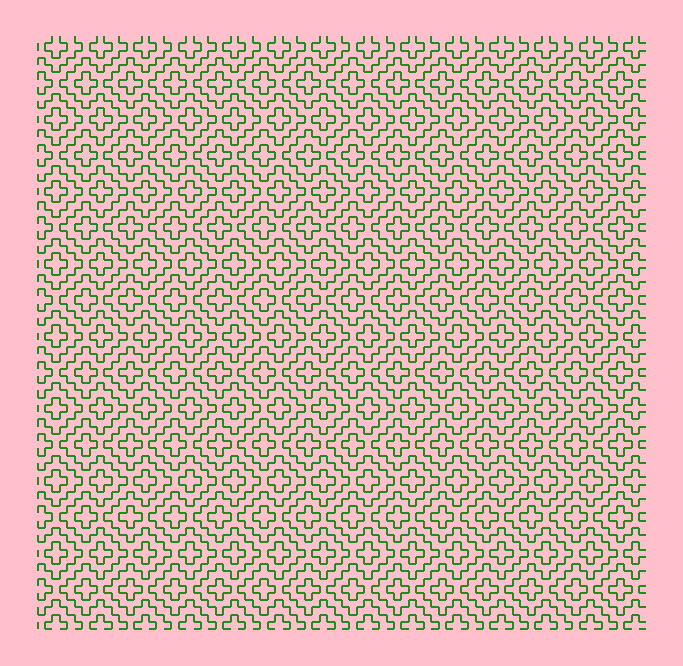

In [165]:
createFigure("001101","11010",82,fg='forestgreen',bg='pink')